In [1]:
import PIL
import numpy as np
from PIL import Image as PIL_Image

In [9]:
print(img)
test_img = np.array(img)
print(test_img.shape)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7F74C1E2B0>
(480, 640, 3)


--- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Adjusting resolution from 384x288 to 640x480.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Writing JPEG image to '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'.
Writing JPEG image to '2'.


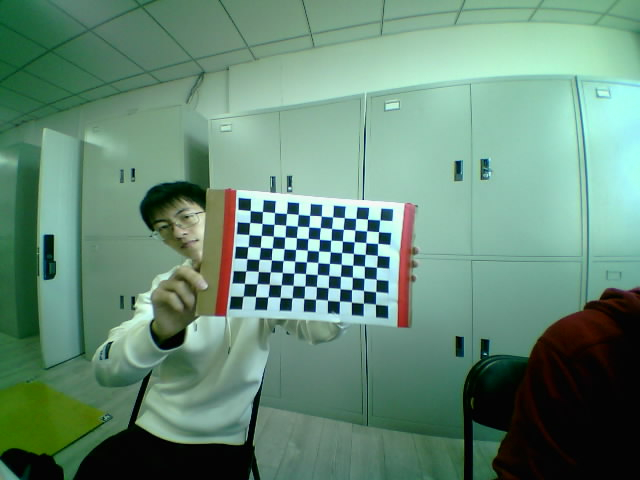

In [39]:
orig_img_path = '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2

img = PIL_Image.open(orig_img_path)
img

In [31]:
# distortion:去畸变的程序
import numpy as np
import cv2
import matplotlib.pyplot as plt

R = np.eye(3)
img_size = (640, 480)
camera_matrix = np.array([[202.0305, 0, 0],
                         [0, 203.5994, 0],
                          [312.0673, 237.1477, 1.0000]]).T
distortion_coefficients = np.array([0.1383, -0.0641, 0, 0]).reshape([4, 1])
# mapx, mapy = cv2.fisheye.initUndistortRectifyMap(camera_matrix, distortion_coefficients, R, camera_matrix, img_size, cv2.CV_32FC1)
# resultImg = cv2.remap(test_img, mapx, mapy, cv2.INTER_LINEAR,  cv2.BORDER_CONSTANT)
resultImg = cv2.undistort(test_img, camera_matrix, distortion_coefficients)
plt.figure(figsize=(20,12))
plt.subplot(121)
plt.imshow(test_img)
plt.subplot(122)
plt.imshow(resultImg)

In [26]:
camera_matrix

array([[ 202.0305,    0.    ,  312.0673],
       [   0.    ,  203.5994,  237.1477],
       [   0.    ,    0.    ,    1.    ]])